In [4]:
import sys 
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
import numpy as np
import scipy as sp
import cartopy.feature as cfeature
import metpy.calc as mpcalc
from metpy.units import units
import pandas as pd 
import statistics
import traceback

In [2]:
#Varibales below on 0.08 degree grid in Gulf of Mexico 
#0UTC March 26 is 8pm March 25, 2018
#(time: 4, latitude: 185, longitude: 285)

#print array without truncation
#np.set_printoptions(threshold=sys.maxsize)

#land-sea mask
#LSM, 0 or 1?
dsM = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.LSM.ec.oper.an.sfc.128_172_lsm.regn1280sc.20180326.nc')
#print(dsM.keys)
#print(dsM.variables)

# 2 metre dewpoint temperature in K 
#VAR_2D
dsTdew = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.VAR_2D.ec.oper.an.sfc.128_168_2d.regn1280sc.20180326.nc')
#print(dsTdew.keys)
#print(dsTdew.variables)

#2 metre temperature in K 
#VAR_2T
dsT = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.VAR_2T.ec.oper.an.sfc.128_167_2t.regn1280sc.20180326.nc')
#print(dsT.keys)
#print(dsT.variables)

#SST in K 
#VSSTK
dsSST = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.SSTK.ec.oper.an.sfc.128_034_sstk.regn1280sc.20180326.nc')
#print(dsT.keys)
#print(dsT.variables)

#U wind in m/s
#VAR_10U
dsU = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.VAR_10U.ec.oper.an.sfc.128_165_10u.regn1280sc.20180326.nc')
#print(dsU.keys)
#print(dsU.variables)

#V wind in m/s
#VAR_10V
dsV = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.VAR_10V.ec.oper.an.sfc.128_166_10v.regn1280sc.20180326.nc')
#print(dsV.keys)
#print(dsV.variables)

#Surface pressure in Pa
#SP
dsP = xr.open_dataset('/Users/Anna/Desktop/MSMET/AirSea/Project1/ECMWFsfc_Mask/577834.SP.ec.oper.an.sfc.128_134_sp.regn1280sc.20180326.nc')
#print(dsP.keys)
print(dsP.variables)

mask=dsM.LSM.values

lat=dsTdew.latitude.values
lon=dsTdew.longitude.values

xLen=len(lon)
yLen=len(lat)

Tdew=dsTdew.VAR_2D.values[0,:,:] #in K @ 2m
TdewC=Tdew-273.15 #in C 

AtmosT = dsT.VAR_2T.values[0,:,:] #in K @ 2m
AtmosTC=AtmosT-273.15 #in C

SST=dsSST.SSTK.values[0,:,:] #in K @ sm
SSTC=SST-273.15 #in C 

Uwind=dsU.VAR_10U.values[0,:,:] #in m/s @ 10m
Vwind= dsV.VAR_10V.values[0,:,:] #in m/s @ 10m
windMag = np.sqrt(Uwind**2+Vwind**2) 

sfcP= dsP.SP.values[0,:,:] #in Pa 
print(windMag.shape)

#print('lat: ', lat)
#print('lon: ', lon)


Frozen({'SP': <xarray.Variable (time: 4, latitude: 185, longitude: 285)>
[210900 values with dtype=float32]
Attributes: (12/15)
    long_name:                     Surface pressure
    short_name:                    sp
    units:                         Pa
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               134
    ...                            ...
    original_data_representation:  Reduced Gaussian grid (N1280)
    rda_dataset:                   ds113.1
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds113.1/
    rda_dataset_doi:               DOI: 10.5065/D68050ZV
    rda_dataset_group:             ECMWF Operational 6-hourly atmospheric sur...
    number_of_significant_digits:  7, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 185)>
array([30.966607, 30.896309, 30.82601 , 30.755711, 30.685412, 30.615114,
       30.544815, 30.474516, 30.404217, 30.333919, 30.26362 , 30.1

C:\Users\Anna\anaconda3\lib\site-packages\xarray\backends\plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:

#SST       
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
ax.set_ylim(26, 27)
ax.set_xlim(270, 271)
cs = ax.contourf(lon, lat, SSTC)
ax.contour(lon, lat, SSTC, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('SSTs')
plt.show()

C:\Users\Anna\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


ValueError: A LinearRing must have at least 3 coordinate tuples

<Figure size 1200x600 with 2 Axes>

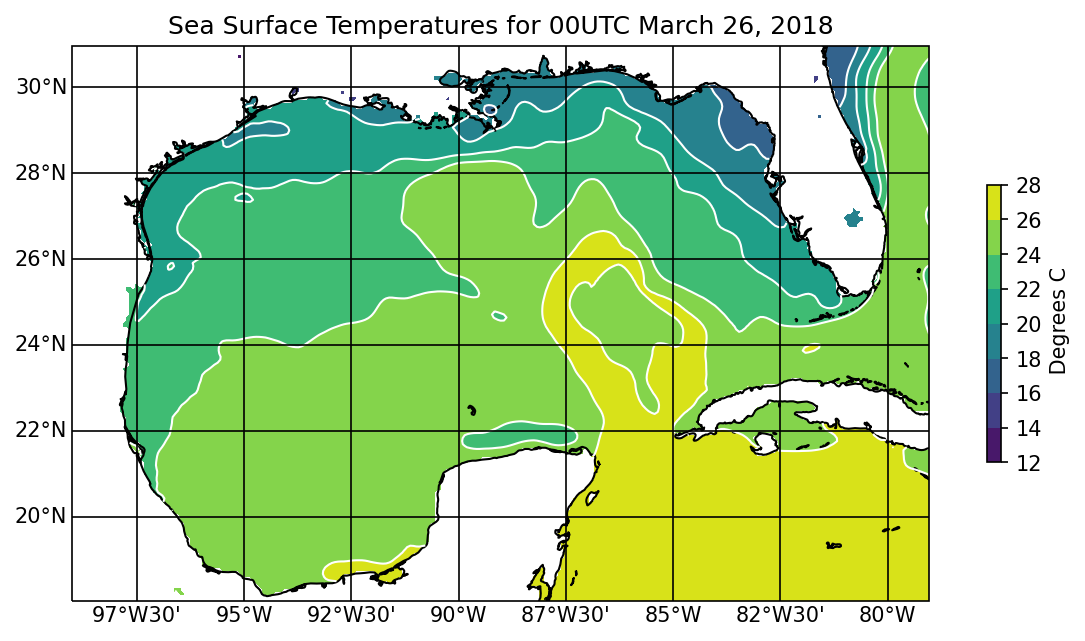

In [6]:
#SST       
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(lon, lat, SSTC)
ax.contour(lon, lat, SSTC, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = ' Degrees C')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('Sea Surface Temperatures for 00UTC March 26, 2018')
plt.show()

In [3]:
from __future__ import print_function
from MFT21 import *
import sys

CONV_CRIT = 0.00005     #convergence critereon (fractional change)  []  
CONVECT = 0.0           #convective parameter  
warn = 0                #warning are given for 1, and hidden for 0    
eqv_neut_prm = 0        #output winds are winds rather than equivalent neutral winds  
z_wanted = 10.0         #height to which winds, potential temp, and humidity are adjusted                                
flux_model = -1         #BVW model=0  

Qnet = 5
sst_prm = 2 #wave age
z0_mom_prm = 1 #like the smith 88 model 
z0_TQ_prm = 1 #0, 1, 4, 5 are all ok 
#Stability Parameter 0=BusingerDyer,1=SmithCollection,2=COAWST,3=Paulson1970
#3 was default
stable_prm = 3
A_oil = 0.0

#Inputs I set 
dyn_in_prm = 0
dyn_in_val2 = 0.0
air_moist_prm = 2
ref_ht_wind = 10.0
ref_ht_tq = 2.0
sfc_moist_prm = 1
sfc_moist_val = 0.98 #over water 
salinity = 0.349 #global average
ss_prm = 0
ss_val = 28.0 #42.8 #typical of ocean/wind swell
astab = 1

#Outputs 
shf = 0.0
lhf = 0.0
tau = [0.0,0.0]
u_star = [0.0,0.0]
t_star = 0.0
q_star= 0.0
z_over_L = 0.0
wave_age = 0.0
dom_phase_spd = 0.0
hsig = 0.0
ww_stab = 0.0 
zo_m = 0.0001
u_at_z = 0.0
t_at_z = 0.0 
q_at_z = 0.0

#fill new arrays with zeros here 
shfArr3=np.zeros((yLen,xLen))
lhfArr3=np.zeros((yLen,xLen))
tauArr3=np.zeros((yLen,xLen))
uStarArr3=np.zeros((yLen,xLen))
tStarArr3=np.zeros((yLen,xLen))
qStarArr3=np.zeros((yLen,xLen))
zOverlArr3=np.zeros((yLen,xLen))
waveAgeArr3=np.zeros((yLen,xLen))
domPhaseSpeedArr3=np.zeros((yLen,xLen))
hsigArr3=np.zeros((yLen,xLen))
wwStabArr3=np.zeros((yLen,xLen))
zomArr3=np.zeros((yLen,xLen))
uAtzArr3=np.zeros((yLen,xLen))
tAtzArr3=np.zeros((yLen,xLen))
qAtzArr3=np.zeros((yLen,xLen))

#fill each array with nans 
shfArr3[:]=np.nan
lhfArr3[:]=np.nan
tauArr3[:]=np.nan
uStarArr3[:]=np.nan
tStarArr3[:]=np.nan
qStarArr3[:]=np.nan
zOverlArr3[:]=np.nan
waveAgeArr3[:]=np.nan
domPhaseSpeedArr3[:]=np.nan
hsigArr3[:]=np.nan
wwStabArr3[:]=np.nan
zomArr3[:]=np.nan
uAtzArr3[:]=np.nan
tAtzArr3[:]=np.nan
qAtzArr3[:]=np.nan




for x in range(0,xLen):
    for y in range(0,yLen):
        #assign other input arrays here
        
        dyn_in_val = windMag[y,x]
        pressure = sfcP[y,x]
        air_moist_val = TdewC[y,x]
        t_air=AtmosTC[y,x]
        t_skin=SSTC[y,x]
        
        if np.isnan(t_skin) == False:
              
            try:

                count, shf, lhf, tau, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z = ht_adj_( dyn_in_prm, 
                        dyn_in_val, dyn_in_val2, CONVECT, CONV_CRIT,
                        pressure, air_moist_prm, air_moist_val, sfc_moist_prm, sfc_moist_val,
                        salinity, ss_prm, ss_val, t_air, sst_prm, t_skin, ref_ht_wind, ref_ht_tq,
                        z_wanted, astab, eqv_neut_prm, Qnet, warn, flux_model, z0_mom_prm, z0_TQ_prm, stable_prm,
                        A_oil, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z )

                #shf as output from function above
                #assign other array outputs here
                shfArr3[y,x]=shf
                lhfArr3[y,x]=lhf
                tauArr3[y,x]=tau[0]
                uStarArr3[y,x]=u_star[0]
                tStarArr3[y,x]=t_star
                qStarArr3[y,x]=q_star
                zOverlArr3[y,x]=z_over_L
                waveAgeArr3[y,x]=wave_age
                domPhaseSpeedArr3[y,x]=dom_phase_spd
                hsigArr3[y,x]=hsig
                wwStabArr3[y,x]=ww_stab
                zomArr3[y,x]=zo_m
                uAtzArr3[y,x]=u_at_z
                tAtzArr3[y,x]=t_at_z
                qAtzArr3[y,x]=q_at_z
                
                #print(shf)

            
            except ZeroDivisionError:
                print(traceback.format_exc())
                #print whatever type of error it is, and print the values associated with the error 
                print("Problem!")
                print(dyn_in_val)
                print(pressure)
                print(air_moist_val)
                print(t_air)
                print(t_skin)


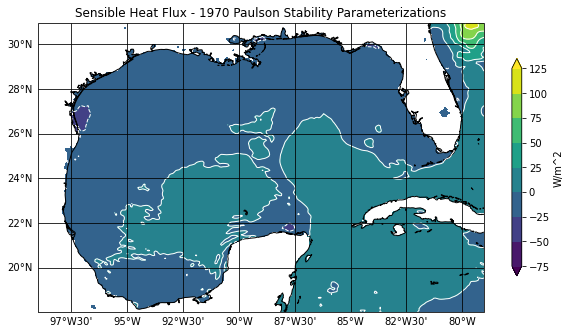

In [39]:
#3 Parameter
#Paulson 1970 parameterizations
#SHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
#levels = np.linspace(0.0 , 3.0, 7)
#CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='min')

levels=np.linspace(-75.0 , 125.0, 9)
cs = ax.contourf(lon, lat, shfArr3, levels=levels, extend='both')
#contnour lines
ax.contour(lon, lat, shfArr3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]


#plt.colorbar.set_ticks([-75, -50, -25, 0, 25, 50, 75, 100, 125])
#plt.colorbar.set_ticklabels(["-75","-50", "-25", "0", "25","50", "75", "100", "125"])


#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2', extend='both', ticks=[-75, -50, -25, 0, 25, 50, 75, 100, 125])
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False

#norm = mpl.colors.Normalize(vmin=-75.0, vmax=125.0)
#im = ax.contourf( lon, lat, shfArr3, levels=[-75,-50,-25,-0, 25, 50, 75, 100, 125],
                 #extend='both',cmap=cmap, norm=norm)


#cmap = mpl.colors.ListedColormap(['b', 'tab:blue','g', 'tab:green','tab:orange', 'r', 'tab:purple', 'm'])

#bounds = [-75.0, -50.0, -25.0, 0.0, 25.0, 50.0, 75.0, 100.0, 125.0]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, boundaries=[-10] + bounds + [10], extend='both', extendfrac='auto',
                                #ticks=bounds, spacing='uniform', orientation='horizontal')

plt.title('Sensible Heat Flux - 1970 Paulson Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


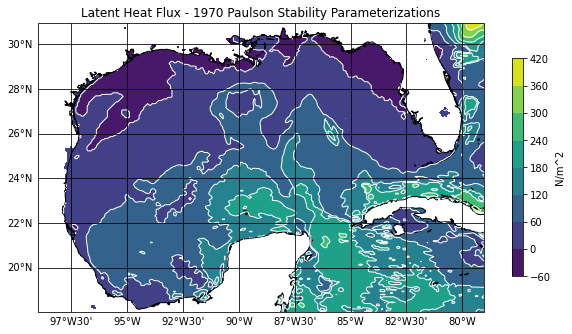

In [52]:
#3 Parameter
#Paulson 1970 parameterizations
#LHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, lhfArr3)
#contnour lines
ax.contour(lon, lat, lhfArr3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Latent Heat Flux - 1970 Paulson Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


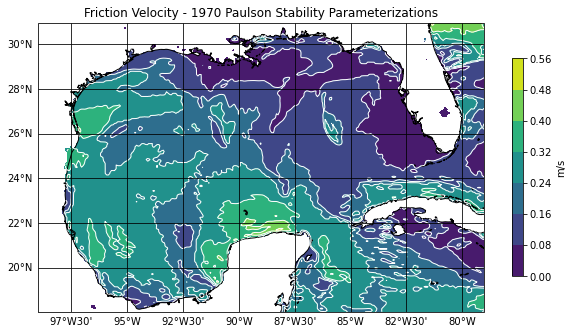

In [53]:
#3 Parameter
#Paulson 1970 parameterizations
#u_star

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, uStarArr3)
#contnour lines
ax.contour(lon, lat, uStarArr3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Friction Velocity - 1970 Paulson Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


In [54]:
#3 Parameter
#Paulson 1970 parameterizations
#statistics


#probably positive, not neg mean 
#negative would be fog or surface condensation 
print('shf')
std3shf=np.nanstd(shfArr3)
mean3shf=np.nanmean(shfArr3)
print(mean3shf)
print(std3shf)

mean3lhf=np.nanmean(lhfArr3)
std3lhf=np.nanstd(lhfArr3)
print('lhf')
print(mean3lhf)
print(std3lhf)

mean3uStar=np.nanmean(uStarArr3)
std3uStar=np.nanstd(uStarArr3)
print('uStar')
print(mean3uStar)
print(std3uStar)


shf
-0.07647440843070988
10.215361898628725
lhf
80.6078142433883
70.5205440396741
uStar
0.18762142300256382
0.09859809544548874


In [28]:
from __future__ import print_function
from MFT21 import *
import sys

CONV_CRIT = 0.00005     #convergence critereon (fractional change)  []  
CONVECT = 0.0           #convective parameter  
warn = 0                #warning are given for 1, and hidden for 0    
eqv_neut_prm = 0        #output winds are winds rather than equivalent neutral winds  
z_wanted = 10.0         #height to which winds, potential temp, and humidity are adjusted                                
flux_model = -1         #BVW model=0  

Qnet = 5
sst_prm = 2 #wave age
z0_mom_prm = 1 #like the smith 88 model 
z0_TQ_prm = 1 #0, 1, 4, 5 are all ok 
#Stability Parameter 0=BusingerDyer,1=SmithCollection,2=COAWST,3=Paulson1970
#3 was default
stable_prm = 2
A_oil = 0.0

#Inputs I set 
dyn_in_prm = 0
dyn_in_val2 = 0.0
air_moist_prm = 2
ref_ht_wind = 10.0
ref_ht_tq = 2.0
sfc_moist_prm = 1
sfc_moist_val = 0.98 #over water 
salinity = 0.349 #global average
ss_prm = 0
ss_val = 28.0 #42.8 #typical of ocean/wind swell
astab = 1

#Outputs 
shf = 0.0
lhf = 0.0
tau = [0.0,0.0]
u_star = [0.0,0.0]
t_star = 0.0
q_star= 0.0
z_over_L = 0.0
wave_age = 0.0
dom_phase_spd = 0.0
hsig = 0.0
ww_stab = 0.0 
zo_m = 0.0001
u_at_z = 0.0
t_at_z = 0.0 
q_at_z = 0.0

#fill new arrays with zeros here 
shfArr2=np.zeros((yLen,xLen))
lhfArr2=np.zeros((yLen,xLen))
tauArr2=np.zeros((yLen,xLen))
uStarArr2=np.zeros((yLen,xLen))
tStarArr2=np.zeros((yLen,xLen))
qStarArr2=np.zeros((yLen,xLen))
zOverlArr2=np.zeros((yLen,xLen))
waveAgeArr2=np.zeros((yLen,xLen))
domPhaseSpeedArr2=np.zeros((yLen,xLen))
hsigArr2=np.zeros((yLen,xLen))
wwStabArr2=np.zeros((yLen,xLen))
zomArr2=np.zeros((yLen,xLen))
uAtzArr2=np.zeros((yLen,xLen))
tAtzArr2=np.zeros((yLen,xLen))
qAtzArr2=np.zeros((yLen,xLen))

#fill each array with nans 
shfArr2[:]=np.nan
lhfArr2[:]=np.nan
tauArr2[:]=np.nan
uStarArr2[:]=np.nan
tStarArr2[:]=np.nan
qStarArr2[:]=np.nan
zOverlArr2[:]=np.nan
waveAgeArr2[:]=np.nan
domPhaseSpeedArr2[:]=np.nan
hsigArr2[:]=np.nan
wwStabArr2[:]=np.nan
zomArr2[:]=np.nan
uAtzArr2[:]=np.nan
tAtzArr2[:]=np.nan
qAtzArr2[:]=np.nan




for x in range(0,xLen):
    for y in range(0,yLen):
        #assign other input arrays here
        
        dyn_in_val = windMag[y,x]
        pressure = sfcP[y,x]
        air_moist_val = TdewC[y,x]
        t_air=AtmosTC[y,x]
        t_skin=SSTC[y,x]
        
        if np.isnan(t_skin) == False:
              
            try:

                count, shf, lhf, tau, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z = ht_adj_( dyn_in_prm, 
                        dyn_in_val, dyn_in_val2, CONVECT, CONV_CRIT,
                        pressure, air_moist_prm, air_moist_val, sfc_moist_prm, sfc_moist_val,
                        salinity, ss_prm, ss_val, t_air, sst_prm, t_skin, ref_ht_wind, ref_ht_tq,
                        z_wanted, astab, eqv_neut_prm, Qnet, warn, flux_model, z0_mom_prm, z0_TQ_prm, stable_prm,
                        A_oil, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z )

                #shf as output from function above
                #assign other array outputs here
                shfArr2[y,x]=shf
                lhfArr2[y,x]=lhf
                tauArr2[y,x]=tau[0]
                uStarArr2[y,x]=u_star[0]
                tStarArr2[y,x]=t_star
                qStarArr2[y,x]=q_star
                zOverlArr2[y,x]=z_over_L
                waveAgeArr2[y,x]=wave_age
                domPhaseSpeedArr2[y,x]=dom_phase_spd
                hsigArr2[y,x]=hsig
                wwStabArr2[y,x]=ww_stab
                zomArr2[y,x]=zo_m
                uAtzArr2[y,x]=u_at_z
                tAtzArr2[y,x]=t_at_z
                qAtzArr2[y,x]=q_at_z
                
                #print(shf)

            
            except ZeroDivisionError:
                print(traceback.format_exc())
                #print whatever type of error it is, and print the values associated with the error 
                print("Problem!")
                print(dyn_in_val)
                print(pressure)
                print(air_moist_val)
                print(t_air)
                print(t_skin)
                

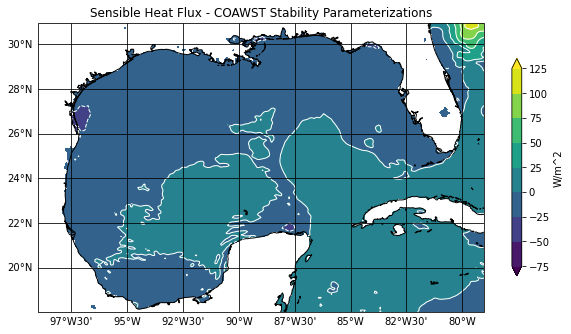

In [38]:
#2 Parameter
#COAWST parameterizations
#SHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
#levels = np.linspace(0.0 , 3.0, 7)
#CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='min')

levels=np.linspace(-75.0 , 125.0, 9)
cs = ax.contourf(lon, lat, shfArr3, levels=levels, extend='both')
#contnour lines
ax.contour(lon, lat, shfArr3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]


#plt.colorbar.set_ticks([-75, -50, -25, 0, 25, 50, 75, 100, 125])
#plt.colorbar.set_ticklabels(["-75","-50", "-25", "0", "25","50", "75", "100", "125"])


#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2', extend='both', ticks=[-75, -50, -25, 0, 25, 50, 75, 100, 125])
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False

#norm = mpl.colors.Normalize(vmin=-75.0, vmax=125.0)
#im = ax.contourf( lon, lat, shfArr3, levels=[-75,-50,-25,-0, 25, 50, 75, 100, 125],
                 #extend='both',cmap=cmap, norm=norm)


#cmap = mpl.colors.ListedColormap(['b', 'tab:blue','g', 'tab:green','tab:orange', 'r', 'tab:purple', 'm'])

#bounds = [-75.0, -50.0, -25.0, 0.0, 25.0, 50.0, 75.0, 100.0, 125.0]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
#cb3 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, boundaries=[-10] + bounds + [10], extend='both', extendfrac='auto',
                                #ticks=bounds, spacing='uniform', orientation='horizontal')
plt.title('Sensible Heat Flux - COAWST Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


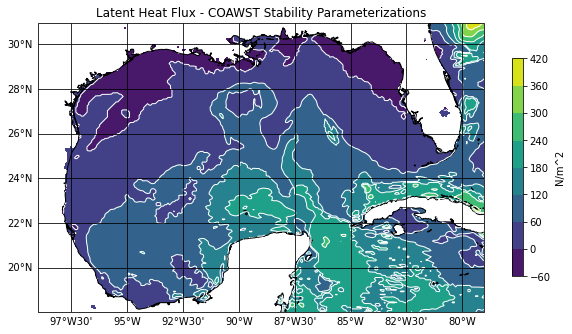

In [57]:
#2 Parameter
#COAWST parameterizations
#LHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, lhfArr2)
#contnour lines
ax.contour(lon, lat, lhfArr2, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Latent Heat Flux - COAWST Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


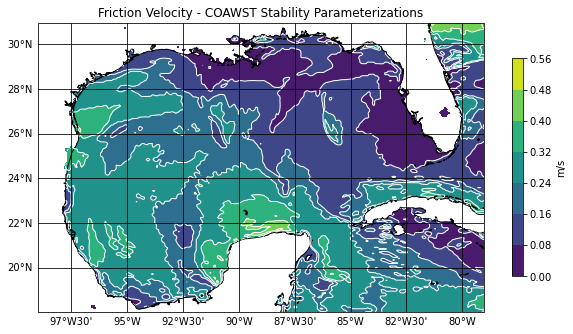

In [58]:
#2 Parameter
#COAWST parameterizations
#u_star

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, uStarArr2)
#contnour lines
ax.contour(lon, lat, uStarArr2, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Friction Velocity - COAWST Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()



In [59]:
#2 Parameter
#COAWST parameterizations
#statistcs

print('shf')
std2shf=np.nanstd(shfArr2)
mean2shf=np.nanmean(shfArr2)
print(mean2shf)
print(std2shf)

mean2lhf=np.nanmean(lhfArr2)
std2lhf=np.nanstd(lhfArr2)
print('lhf')
print(mean2lhf)
print(std2lhf)

mean2uStar=np.nanmean(uStarArr2)
std2uStar=np.nanstd(uStarArr2)
print('uStar')
print(mean2uStar)
print(std2uStar)


shf
-0.12146703591002783
10.131379496996011
lhf
79.66098000095452
69.76794947343794
uStar
0.18733962076682856
0.09850340869166618


In [32]:
from __future__ import print_function
from MFT21 import *
import sys

CONV_CRIT = 0.00005     #convergence critereon (fractional change)  []  
CONVECT = 0.0           #convective parameter  
warn = 0                #warning are given for 1, and hidden for 0    
eqv_neut_prm = 0        #output winds are winds rather than equivalent neutral winds  
z_wanted = 10.0         #height to which winds, potential temp, and humidity are adjusted                                
flux_model = -1         #BVW model=0  

Qnet = 5
sst_prm = 2 #wave age
z0_mom_prm = 1 #like the smith 88 model 
z0_TQ_prm = 1 #0, 1, 4, 5 are all ok 
#Stability Parameter 0=BusingerDyer,1=SmithCollection,2=COAWST,3=Paulson1970
#3 was default
stable_prm = 1
A_oil = 0.0

#Inputs I set 
dyn_in_prm = 0
dyn_in_val2 = 0.0
air_moist_prm = 2
ref_ht_wind = 10.0
ref_ht_tq = 2.0
sfc_moist_prm = 1
sfc_moist_val = 0.98 #over water 
salinity = 0.349 #global average
ss_prm = 0
ss_val = 28.0 #42.8 #typical of ocean/wind swell
astab = 1

#Outputs 
shf = 0.0
lhf = 0.0
tau = [0.0,0.0]
u_star = [0.0,0.0]
t_star = 0.0
q_star= 0.0
z_over_L = 0.0
wave_age = 0.0
dom_phase_spd = 0.0
hsig = 0.0
ww_stab = 0.0 
zo_m = 0.0001
u_at_z = 0.0
t_at_z = 0.0 
q_at_z = 0.0

#fill new arrays with zeros here 
shfArr1=np.zeros((yLen,xLen))
lhfArr1=np.zeros((yLen,xLen))
tauArr1=np.zeros((yLen,xLen))
uStarArr1=np.zeros((yLen,xLen))
tStarArr1=np.zeros((yLen,xLen))
qStarArr1=np.zeros((yLen,xLen))
zOverlArr1=np.zeros((yLen,xLen))
waveAgeArr1=np.zeros((yLen,xLen))
domPhaseSpeedArr1=np.zeros((yLen,xLen))
hsigArr1=np.zeros((yLen,xLen))
wwStabArr1=np.zeros((yLen,xLen))
zomArr1=np.zeros((yLen,xLen))
uAtzArr1=np.zeros((yLen,xLen))
tAtzArr1=np.zeros((yLen,xLen))
qAtzArr1=np.zeros((yLen,xLen))

#fill each array with nans 
shfArr1[:]=np.nan
lhfArr1[:]=np.nan
tauArr1[:]=np.nan
uStarArr1[:]=np.nan
tStarArr1[:]=np.nan
qStarArr1[:]=np.nan
zOverlArr1[:]=np.nan
waveAgeArr1[:]=np.nan
domPhaseSpeedArr1[:]=np.nan
hsigArr1[:]=np.nan
wwStabArr1[:]=np.nan
zomArr1[:]=np.nan
uAtzArr1[:]=np.nan
tAtzArr1[:]=np.nan
qAtzArr1[:]=np.nan




for x in range(0,xLen):
    for y in range(0,yLen):
        #assign other input arrays here
        
        dyn_in_val = windMag[y,x]
        pressure = sfcP[y,x]
        air_moist_val = TdewC[y,x]
        t_air=AtmosTC[y,x]
        t_skin=SSTC[y,x]
        
        if np.isnan(t_skin) == False:
              
            try:

                count, shf, lhf, tau, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z = ht_adj_( dyn_in_prm, 
                        dyn_in_val, dyn_in_val2, CONVECT, CONV_CRIT,
                        pressure, air_moist_prm, air_moist_val, sfc_moist_prm, sfc_moist_val,
                        salinity, ss_prm, ss_val, t_air, sst_prm, t_skin, ref_ht_wind, ref_ht_tq,
                        z_wanted, astab, eqv_neut_prm, Qnet, warn, flux_model, z0_mom_prm, z0_TQ_prm, stable_prm,
                        A_oil, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z )

                #shf as output from function above
                #assign other array outputs here
                shfArr1[y,x]=shf
                lhfArr1[y,x]=lhf
                tauArr1[y,x]=tau[0]
                uStarArr1[y,x]=u_star[0]
                tStarArr1[y,x]=t_star
                qStarArr1[y,x]=q_star
                zOverlArr1[y,x]=z_over_L
                waveAgeArr1[y,x]=wave_age
                domPhaseSpeedArr1[y,x]=dom_phase_spd
                hsigArr1[y,x]=hsig
                wwStabArr1[y,x]=ww_stab
                zomArr1[y,x]=zo_m
                uAtzArr1[y,x]=u_at_z
                tAtzArr1[y,x]=t_at_z
                qAtzArr1[y,x]=q_at_z
                
                #print(shf)

            
            except ZeroDivisionError:
                print(traceback.format_exc())
                #print whatever type of error it is, and print the values associated with the error 
                print("Problem!")
                print(dyn_in_val)
                print(pressure)
                print(air_moist_val)
                print(t_air)
                print(t_skin)
                

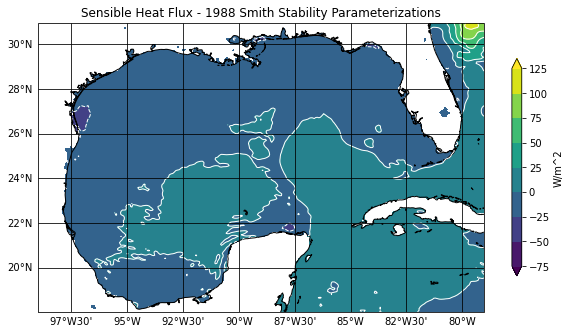

In [37]:
#1 Parameter
#Smith (1988; JGR) collection of parameterizations
#SHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
#levels = np.linspace(0.0 , 3.0, 7)
#CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='min')

levels=np.linspace(-75.0 , 125.0, 9)
cs = ax.contourf(lon, lat, shfArr3, levels=levels, extend='both')
#contnour lines
ax.contour(lon, lat, shfArr3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]

#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2', extend='both', ticks=[-75, -50, -25, 0, 25, 50, 75, 100, 125])
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False


plt.title('Sensible Heat Flux - 1988 Smith Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()




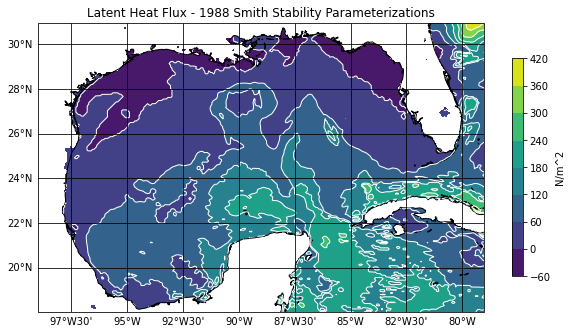

In [62]:
#1 Parameter
#Smith (1988; JGR) collection of parameterizations
#LHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, lhfArr1)
#contnour lines
ax.contour(lon, lat, lhfArr1, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Latent Heat Flux - 1988 Smith Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


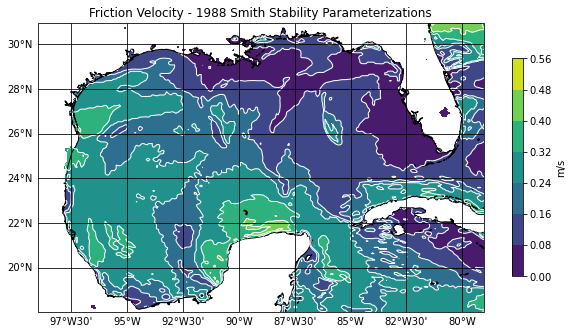

In [63]:
#1 Parameter
#Smith (1988; JGR) collection of parameterizations
#u_star

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, uStarArr1)
#contnour lines
ax.contour(lon, lat, uStarArr1, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Friction Velocity - 1988 Smith Stability Parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()



In [64]:
#1 Parameter
#Smith (1988; JGR) collection of parameterizations
#statistics

#probably positive, not neg mean 
#negative would be fog or surface condensation 
print('shf')
std1shf=np.nanstd(shfArr1)
mean1shf=np.nanmean(shfArr1)
print(mean1shf)
print(std1shf)

mean1lhf=np.nanmean(lhfArr1)
std1lhf=np.nanstd(lhfArr1)
print('lhf')
print(mean1lhf)
print(std1lhf)

mean1uStar=np.nanmean(uStarArr1)
std1uStar=np.nanstd(uStarArr1)
print('uStar')
print(mean1uStar)
print(std1uStar)



shf
-0.07663790395666885
10.215395783968303
lhf
80.60871869770018
70.51981662842753
uStar
0.18762605153394793
0.09859050320236291


In [34]:
from __future__ import print_function
from MFT21 import *
import sys

CONV_CRIT = 0.00005     #convergence critereon (fractional change)  []  
CONVECT = 0.0           #convective parameter  
warn = 0                #warning are given for 1, and hidden for 0    
eqv_neut_prm = 0        #output winds are winds rather than equivalent neutral winds  
z_wanted = 10.0         #height to which winds, potential temp, and humidity are adjusted                                
flux_model = -1         #BVW model=0  

Qnet = 5
sst_prm = 2 #wave age
z0_mom_prm = 1 # 
z0_TQ_prm = 1 #0, 1, 4, 5 are all ok 
#Stability Parameter 0=BusingerDyer,1=SmithCollection,2=COAWST,3=Paulson1970
#3 was default
stable_prm = 0
A_oil = 0.0

#Inputs I set 
dyn_in_prm = 0
dyn_in_val2 = 0.0
air_moist_prm = 2
ref_ht_wind = 10.0
ref_ht_tq = 2.0
sfc_moist_prm = 1
sfc_moist_val = 0.98 #over water 
salinity = 0.349 #global average
ss_prm = 0
ss_val = 28.0 #42.8 #typical of ocean/wind swell
astab = 1

#Outputs 
shf = 0.0
lhf = 0.0
tau = [0.0,0.0]
u_star = [0.0,0.0]
t_star = 0.0
q_star= 0.0
z_over_L = 0.0
wave_age = 0.0
dom_phase_spd = 0.0
hsig = 0.0
ww_stab = 0.0 
zo_m = 0.0001
u_at_z = 0.0
t_at_z = 0.0 
q_at_z = 0.0

#fill new arrays with zeros here 
shfArr0=np.zeros((yLen,xLen))
lhfArr0=np.zeros((yLen,xLen))
tauArr0=np.zeros((yLen,xLen))
uStarArr0=np.zeros((yLen,xLen))
tStarArr0=np.zeros((yLen,xLen))
qStarArr0=np.zeros((yLen,xLen))
zOverlArr0=np.zeros((yLen,xLen))
waveAgeArr0=np.zeros((yLen,xLen))
domPhaseSpeedArr0=np.zeros((yLen,xLen))
hsigArr0=np.zeros((yLen,xLen))
wwStabArr0=np.zeros((yLen,xLen))
zomArr0=np.zeros((yLen,xLen))
uAtzArr0=np.zeros((yLen,xLen))
tAtzArr0=np.zeros((yLen,xLen))
qAtzArr0=np.zeros((yLen,xLen))

#shfValues=np.zeros
#lhfValues=np.zeros
#uStarValues=np.zeros

#fill each array with nans 
shfArr0[:]=np.nan
lhfArr0[:]=np.nan
tauArr0[:]=np.nan
uStarArr0[:]=np.nan
tStarArr0[:]=np.nan
qStarArr0[:]=np.nan
zOverlArr0[:]=np.nan
waveAgeArr0[:]=np.nan
domPhaseSpeedArr0[:]=np.nan
hsigArr0[:]=np.nan
wwStabArr0[:]=np.nan
zomArr0[:]=np.nan
uAtzArr0[:]=np.nan
tAtzArr0[:]=np.nan
qAtzArr0[:]=np.nan

#shfValues[:]=np.nan
#lhfValues[:]=np.nan
#uStarValues[:]=np.nan


for x in range(0,xLen):
    for y in range(0,yLen):
        #assign other input arrays here
        
        dyn_in_val = windMag[y,x]
        pressure = sfcP[y,x]
        air_moist_val = TdewC[y,x]
        t_air=AtmosTC[y,x]
        t_skin=SSTC[y,x]
        
        if np.isnan(t_skin) == False:
              
            try:

                count, shf, lhf, tau, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z = ht_adj_( dyn_in_prm, 
                        dyn_in_val, dyn_in_val2, CONVECT, CONV_CRIT,
                        pressure, air_moist_prm, air_moist_val, sfc_moist_prm, sfc_moist_val,
                        salinity, ss_prm, ss_val, t_air, sst_prm, t_skin, ref_ht_wind, ref_ht_tq,
                        z_wanted, astab, eqv_neut_prm, Qnet, warn, flux_model, z0_mom_prm, z0_TQ_prm, stable_prm,
                        A_oil, u_star, t_star, q_star, z_over_L, wave_age, dom_phase_spd, hsig, ww_stab, zo_m, u_at_z, t_at_z, q_at_z )

                #shf as output from function above
                #assign other array outputs here
                shfArr0[y,x]=shf
                lhfArr0[y,x]=lhf
                tauArr0[y,x]=tau[0]
                uStarArr0[y,x]=u_star[0]
                tStarArr0[y,x]=t_star
                qStarArr0[y,x]=q_star
                zOverlArr0[y,x]=z_over_L
                waveAgeArr0[y,x]=wave_age
                domPhaseSpeedArr0[y,x]=dom_phase_spd
                hsigArr0[y,x]=hsig
                wwStabArr0[y,x]=ww_stab
                zomArr0[y,x]=zo_m
                uAtzArr0[y,x]=u_at_z
                tAtzArr0[y,x]=t_at_z
                qAtzArr0[y,x]=q_at_z
                
                
                #1d array for statistics here 
                
                #shfValues=shf
                #lhfValues[:]=lhf
                #uStarValues[:]=u_star[0]

            
            except ZeroDivisionError:
                print(traceback.format_exc())
                #print whatever type of error it is, and print the values associated with the error 
                print("Problem!")
                print(dyn_in_val)
                print(pressure)
                print(air_moist_val)
                print(t_air)
                print(t_skin)

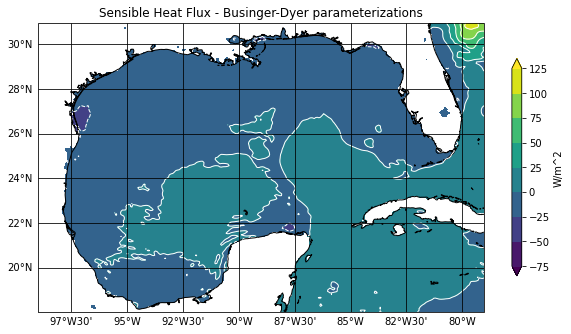

In [36]:
#0 Parameter
#Businger-Dyer parameterizations
#SHF


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
#levels = np.linspace(0.0 , 3.0, 7)
#CS = plt.contourf(X, Y, Z, levels=levels, cmap=cm.coolwarm, extend='min')

levels=np.linspace(-75.0 , 125.0, 9)
cs = ax.contourf(lon, lat, shfArr3, levels=levels, extend='both')
#contnour lines
ax.contour(lon, lat, shfArr3, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]

#plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2', extend='both', ticks=[-75, -50, -25, 0, 25, 50, 75, 100, 125])
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')

gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False

plt.title('Sensible Heat Flux - Businger-Dyer parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


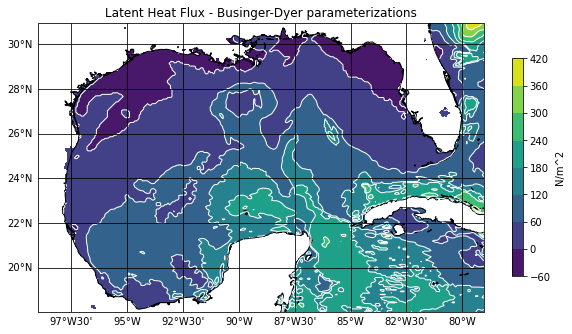

In [67]:
#0 Parameter
#Businger-Dyer parameterizations
#LHF

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, lhfArr0)
#contnour lines
ax.contour(lon, lat, lhfArr0, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'W/m^2')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Latent Heat Flux - Businger-Dyer parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


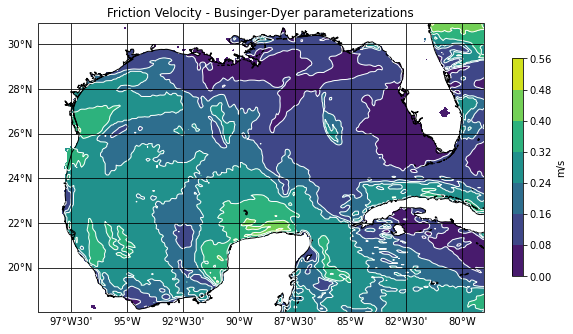

In [68]:
#0 Parameter
#Businger-Dyer parameterizations
#u_star

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=mapcrs)
#gives coastlines
ax.coastlines()
#filled contours (lon, lat, thing plotted)
cs = ax.contourf(lon, lat, uStarArr0)
#contnour lines
ax.contour(lon, lat, uStarArr0, colors = 'white', linewidths = 1, transform=ccrs.PlateCarree())
#ax=plt.gca()
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, shrink = 0.5, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
#don't want labels
gl.top_labels = False
gl.ylabels_right = False
plt.title('Friction Velocity - Businger-Dyer parameterizations')
#plt.savefig('PV_110.png', bbox_inches='tight', dpi=150)
plt.show()


In [69]:
#0 Parameter
#Businger-Dyer parameterizations
#statistics

#probably positive, not neg mean 
#negative would be fog or surface condensation 
print('shf')
std0shf=np.nanstd(shfArr0)
mean0shf=np.nanmean(shfArr0)
print(mean0shf)
print(std0shf)

mean0lhf=np.nanmean(lhfArr0)
std0lhf=np.nanstd(lhfArr0)
print('lhf')
print(mean0lhf)
print(std0lhf)

mean0uStar=np.nanmean(uStarArr0)
std0uStar=np.nanstd(uStarArr0)
print('uStar')
print(mean0uStar)
print(std0uStar)


shf
-0.3966661085911223
10.217291573970666
lhf
79.68722011011634
69.74986015667444
uStar
0.19084058646448487
0.09273158680040605


In [70]:
#STATS

std0sh=np.nanstd(shfArr0)
mean0shf=np.nanmean(shfArr0)
std1shf=np.nanstd(shfArr1)
mean1shf=np.nanmean(shfArr1)
std2shf=np.nanstd(shfArr2)
mean2shf=np.nanmean(shfArr2)
std3shf=np.nanstd(shfArr3)
mean3shf=np.nanmean(shfArr3)
#0, 1, 2, 3
shfMean = np.array([-0.3966661085911223, -0.07663790395666885, -0.12146703591002783, -0.07647440843070988])
 
mean0lhf=np.nanmean(lhfArr0)
std0lhf=np.nanstd(lhfArr0)
mean1lhf=np.nanmean(lhfArr1)
std1lhf=np.nanstd(lhfArr1)
mean2lhf=np.nanmean(lhfArr2)
std2lhf=np.nanstd(lhfArr2)
mean3lhf=np.nanmean(lhfArr3)
std3lhf=np.nanstd(lhfArr3) 

lhfMean = np.array([79.68722011011634, 80.60871869770018, 79.66098000095452, 80.6078142433883])

mean0uStar=np.nanmean(uStarArr0)
std0uStar=np.nanstd(uStarArr0)
mean1uStar=np.nanmean(uStarArr1)
std1uStar=np.nanstd(uStarArr1)
mean2uStar=np.nanmean(uStarArr2)
std2uStar=np.nanstd(uStarArr2)
mean3uStar=np.nanmean(uStarArr3)
std3uStar=np.nanstd(uStarArr3)

uStarMean = np.array([0.19084058646448487, 0.18762605153394793, 0.18733962076682856, 0.18762142300256382])




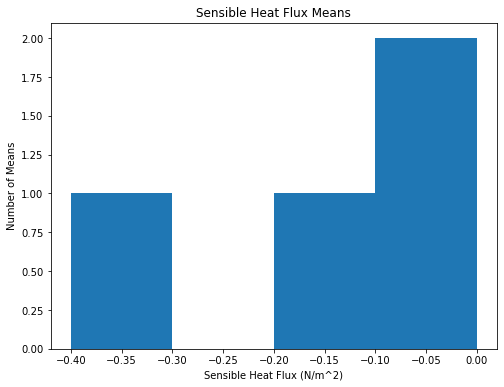

In [71]:
#Mean Plot shf

# Creating histogram
fig, ax = plt.subplots(figsize =(8, 6))
ax.hist(shfMean, bins = [-0.4, -0.3, -0.2, -0.1, 0.0])
plt.ylabel("Number of Means")
plt.xlabel("Sensible Heat Flux (N/m^2)")
plt.title('Sensible Heat Flux Means')
# Show plot
plt.show()

#0 is left most, then 2, and far right is 1 & 3 

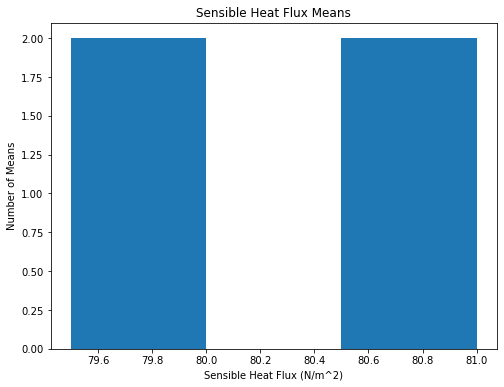

In [72]:
#Mean Plot lhf 
79.6-80.6
# Creating histogram
fig, ax = plt.subplots(figsize =(8, 6))
ax.hist(lhfMean, bins = [79.5, 80.0, 80.5, 81.0])
plt.ylabel("Number of Means")
plt.xlabel("Sensible Heat Flux (N/m^2)")
plt.title('Sensible Heat Flux Means')
# Show plot
plt.show()

#Left: 0,2 Right: 1,3

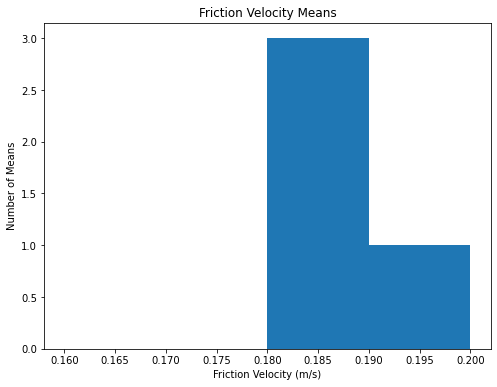

In [73]:
#Mean Plot u_star 

# Creating histogram
fig, ax = plt.subplots(figsize =(8, 6))
ax.hist(uStarMean, bins = [0.16, 0.17, 0.18, 0.19, 0.20])
plt.ylabel("Number of Means")
plt.xlabel("Friction Velocity (m/s)")
plt.title('Friction Velocity Means')
# Show plot
plt.show()

#left: 1,2,3 Right: 0


In [101]:
#rms differences shf 0-3 & rms std  lhf 0-3, uStar 0-3

shf0=shfArr0
shf1=shfArr1
shf2=shfArr2
shf3=shfArr3

count=0
sumSquare=0

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf0[j,i]) == False or np.isnan(shf1[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf0[j,i],shf1[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf01: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf0[j,i]) == False or np.isnan(shf2[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf0[j,i],shf2[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf02: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf0[j,i]) == False or np.isnan(shf3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf0[j,i],shf3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf03: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf1[j,i]) == False or np.isnan(shf2[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf1[j,i],shf2[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf12: ", rmse)

    
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf1[j,i]) == False or np.isnan(shf3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf1[j,i],shf3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf13: ", rmse)

    
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(shf2[j,i]) == False or np.isnan(shf3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(shf2[j,i],shf3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error shf23: ", rmse)

#rms diff std 

shfRMS=([ 1.321547955563861, 1.3172096825720598, 1.3187038927149204, 1.1445343127197316, 1.0237339947241182, 0.9366042722697767])
shfRMSstd=np.std(shfRMS)
print(shfRMSstd)


Root Mean Square Error shf01:  1.321547955563861
Root Mean Square Error shf02:  1.3172096825720598
Root Mean Square Error shf03:  1.3187038927149204
Root Mean Square Error shf12:  1.1445343127197316
Root Mean Square Error shf13:  1.0237339947241182
Root Mean Square Error shf23:  0.9366042722697767
0.15436290372851008


In [102]:
#rms differences lhf 0-3 & rms std  


lhf0=lhfArr0
lhf1=lhfArr1
lhf2=lhfArr2
lhf3=lhfArr3

count=0
sumSquare=0

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(lhf0[j,i]) == False or np.isnan(lhf1[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(lhf0[j,i],lhf1[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error lhf01: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(lhf0[j,i]) == False or np.isnan(lhf2[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(lhf0[j,i],lhf2[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error lhf02: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(lhf0[j,i]) == False or np.isnan(lhf3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(lhf0[j,i],lhf3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error lhf03: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(lhf1[j,i]) == False or np.isnan(lhf2[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(lhf1[j,i],lhf2[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error lhf12: ", rmse)

    
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(lhf1[j,i]) == False or np.isnan(lhf3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(lhf1[j,i],lhf3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error lhf13: ", rmse)

    
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(lhf2[j,i]) == False or np.isnan(lhf3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(lhf2[j,i],lhf3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error lhf23: ", rmse)


lhfRMS=([2.945073205941938, 2.2787380293969113, 2.52069773076905, 2.550655284097947,2.281541223794886,2.3448830355413794 ])
lhfRMSstd=np.std(lhfRMS)
print(lhfRMSstd)

Root Mean Square Error lhf01:  2.945073205941938
Root Mean Square Error lhf02:  2.2787380293969113
Root Mean Square Error lhf03:  2.52069773076905
Root Mean Square Error lhf12:  2.550655284097947
Root Mean Square Error lhf13:  2.281541223794886
Root Mean Square Error lhf23:  2.3448830355413794
0.2312293791670527


In [103]:
#rms differences uStar 0-3 & rms std  

uStar0=uStarArr0
uStar1=uStarArr1
uStar2=uStarArr2
uStar3=uStarArr3

count=0
sumSquare=0

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(uStar0[j,i]) == False or np.isnan(uStar1[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(uStar0[j,i],uStar1[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error uStar01: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(uStar0[j,i]) == False or np.isnan(uStar2[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(uStar0[j,i],uStar2[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error uStar02: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(uStar0[j,i]) == False or np.isnan(uStar3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(uStar0[j,i],uStar3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error uStar03: ", rmse)

for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(uStar1[j,i]) == False or np.isnan(uStar2[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(uStar1[j,i],uStar2[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error uStar12: ", rmse)

    
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(uStar1[j,i]) == False or np.isnan(uStar3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(uStar1[j,i], uStar3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error uStar13: ", rmse)

    
for i in range(0,xLen -1):
    for j in range(0,yLen -1):
        if np.isnan(uStar2[j,i]) == False or np.isnan(uStar3[j,i]) == False:
            count = count + 1 
            sumSquare= sumSquare + np.square(np.subtract(uStar2[j,i],uStar3[j,i]))
            
rmse=np.sqrt(sumSquare/count)  
print("Root Mean Square Error uStar23: ", rmse)


uStarRMS=([0.01413720141968875, 0.014050895604948956, 0.01408273913913792, 0.012245777010283733,0.01095485093838716,0.010042551760584295 ])
uStarRMSstd=np.std(uStarRMS)
print(uStarRMSstd)

Root Mean Square Error uStar01:  0.01413720141968875
Root Mean Square Error uStar02:  0.014050895604948956
Root Mean Square Error uStar03:  0.01408273913913792
Root Mean Square Error uStar12:  0.012245777010283733
Root Mean Square Error uStar13:  0.01095485093838716
Root Mean Square Error uStar23:  0.010042551760584295
0.0016349261075485244
